In [1]:
!pip install networkx

In [431]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [1440]:
general=nx.DiGraph()

In [1441]:
def generate_directed_edges(H):
    edges = []
    
    # Create directed edges with given probability
    for j in range(7):
    
        for i in range(3):
            if j%2==0:
                edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                if i==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                else:
                    edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                    edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"P",{'weight': 2.25}))
            elif j%2!=0:
                edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                if i==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                else:
                    edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                    edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"L",{'weight': 2.25}))
 
        if j>0:
            edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j)+"P",str(H)+"0"+str(j+1)+"P",{'weight': 4.1}))
            edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j)+"P",{'weight': 4.1}))
    return edges




In [1680]:
def draw_nodes(G,X=0,Y=0,DX=1,DY=1):
    pos={}
    nodes=np.array(G.nodes())
    for k in nodes:
        
        if str(k)=="H1Biuro":
            pos.update({k:[30*DX+X,-5*DY+Y]})
        elif str(k)=="H5Punkt rozładunku":
            pos.update({k:[30*DX+X,-5*DY+Y]})
        elif (str(k)).endswith("L"):
            pos.update({k:[-2*DX+X,-int((str(k))[-2])*DY+Y]})
        elif (str(k)).endswith("P"):
            pos.update({k:[40*DX+X,-int((str(k))[-2])*DY+Y]})           
        elif (str(k)).endswith("S"):
            pos.update({k:[18*DX+X,-int((str(k))[-2])*DY+Y]})
        elif int((str(k))[-3])%2!=0:
            if int((str(k))[-2])==0:
                if int((str(k))[-1])==9:
                    pos.update({k:[2*int((str(k))[-1])*DX+4+X,-int((str(k))[-3])*DY+Y]})
                else:
                    pos.update({k:[2*int((str(k))[-1])*DX+X,-int((str(k))[-3])*DY+Y]})
            else:
                pos.update({k:[2*(int((str(k))[-2]+(str(k))[-1])+2)*DX+X,-int((str(k))[-3])*DY+Y]})
        else:
            if int((str(k))[-3])%2==1:
                if int((str(k))[-2])==0:
                    if int((str(k))[-1])==9:
                        pos.update({k:[2*int((str(k))[-1])*DX+4+X,-int((str(k))[-3])*DY+Y]})
                    else:
                        pos.update({k:[2*int((str(k))[-1])*DX+X,-int((str(k))[-3])*DY+Y]})
                else:
                    pos.update({k:[2*(int((str(k))[-2]+(str(k))[-1])*DX+2+X),-int((str(k))[-3])*DY+Y]})
            else:
                if int((str(k))[-2])==0:
                    if int((str(k))[-1])==9:
                        pos.update({k:[int((str(k))[-1])*DX+5+X,-int((str(k))[-3])*DY]})
                    else:
                        pos.update({k:[-2*(int((str(k))[-1]))*DX+36+X,-int((str(k))[-3])*DY+Y]})
                else:
                    pos.update({k:[-2*int((str(k))[-2]+(str(k))[-1])*DX+32+X,-int((str(k))[-3])*DY+Y]})
                    
    return pos

In [1681]:
def generate_directed_edges_special(H,spc=None):
    
        
    edges = []
    
    # Create directed edges with given probability
    for j in range(7):
        if j>0 and j<4:
                edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j)+"P",str(H)+"0"+str(j+1)+"P",{'weight': 4.1}))
                edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j)+"P",{'weight': 4.1}))
        if j>3:
            for i in range(3):
                if j%2==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                    edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                    edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
                    edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
                    edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
                    edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
                elif j%2!=0:
                    if i==0:
                        edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    else:
                        edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"L",{'weight': 2.25}))
                        edges.append((str(H)+"0"+str(j)+"S",str(H)+"0"+str(j+1)+"S",{'weight': 4.1}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j)+"S",{'weight': 4.1}))
                        edges.append((str(H)+"0"+str(j)+"L",str(H)+"0"+str(j+1)+"L",{'weight': 4.1}))
                        edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j)+"L",{'weight': 4.1}))
            
        else:
            for i in range(3):
                if j%2==0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                    if i==0:
                        edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    else:
                        edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"L",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                        edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"P",{'weight': 2.25}))
                elif j%2!=0:
                    edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+1),str(H)+"0"+str(j+1)+"0"+str(2*i+3),{'weight': 3}))
                    if i==0:
                        edges.append((str(H)+"0"+str(j+1)+"0"+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                    else:
                        edges.append((str(H)+"0"+str(j+1)+str(2*i+9),str(H)+"0"+str(j+1)+str(2*i+11),{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"07",str(H)+"0"+str(j+1)+"S",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"S",str(H)+"0"+str(j+1)+"09",{'weight': 3}))
                        edges.append((str(H)+"0"+str(j+1)+"P",str(H)+"0"+str(j+1)+"01",{'weight': 2.25}))
                        edges.append((str(H)+"0"+str(j+1)+"15",str(H)+"0"+str(j+1)+"L",{'weight': 2.25}))
        if spc!=None and spc.lower()=="b":
            what_room("Biuro",str(H),edges)
        elif spc!=None and spc.lower()=="c":
            what_room1("Punkt rozładunku",str(H),edges)
    return edges




In [1682]:
def what_room(name,H,edges):
            for i in range(4):
                edges.append((str(H)+str(name),str(H)+"0"+str(7-i)+"S",{'weight': 8.5}))
            for i in range(4):
                    edges.append((str(H)+str(name),str(H)+"0"+str(7-3)+"0"+str(2*i+1),{'weight': 8.5}))
            edges.append((str(H)+str(name),str(H)+"0"+str(7-3)+"P",{'weight': 8.5}))

def what_room1(name,H,edges):
            for i in range(4):
                edges.append((str(H)+"0"+str(7-i)+"S",(str(H)+str(name)),{'weight': 8.5}))
            for i in range(4):
                    edges.append((str(H)+"0"+str(7-3)+"0"+str(2*i+1),(str(H)+str(name)),{'weight': 8.5}))
            edges.append((str(H)+"0"+str(7-3)+"P",(str(H)+str(name)),{'weight': 8.5}))
            

In [1683]:
H1=nx.DiGraph()
H2=nx.DiGraph()
H3=nx.DiGraph()
H4=nx.DiGraph()
H5=nx.DiGraph()

edges1=generate_directed_edges_special("H1",spc="B")
edges2=generate_directed_edges("H2")
edges3=generate_directed_edges("H3")
edges4=generate_directed_edges("H4")
edges5=generate_directed_edges_special("H5",spc="C")

H1.add_edges_from(edges1)
H2.add_edges_from(edges2)
H3.add_edges_from(edges3)
H4.add_edges_from(edges4)
H5.add_edges_from(edges5)

In [1684]:
all=nx.compose(H1,nx.compose(H2,nx.compose(H3,nx.compose(H4,H5))))

In [1685]:
all.add_edge('H107S','H301S',weight = 4.1)
all.add_edge('H301S','H107S',weight = 4.1)
all.add_edge('H302L','H202P',weight = 4.1)
all.add_edge('H202P','H302L',weight = 4.1)
all.add_edge('H305L','H205P',weight = 4.1)
all.add_edge('H205P','H305L',weight = 4.1)
all.add_edge('H307S','H501S',weight = 4.1)
all.add_edge('H501S','H307S',weight = 4.1)

all.add_edge('H502L','H402P',weight = 4.1)
all.add_edge('H402P','H502L',weight = 4.1)
all.add_edge('H505L','H405P',weight = 4.1)
all.add_edge('H405P','H505L',weight = 4.1)
all.add_edge('H207S','H401S',weight = 4.1)
all.add_edge('H401S','H207S',weight = 4.1)

In [1686]:
djisktra=nx.dijkstra_path(all, "H1Biuro", "H5Punkt rozładunku")

In [1687]:
print(djisktra)

['H1Biuro', 'H107S', 'H301S', 'H302S', 'H303S', 'H304S', 'H305S', 'H306S', 'H307S', 'H501S', 'H502S', 'H503S', 'H504S', 'H5Punkt rozładunku']


<Figure size 10000x10000 with 0 Axes>

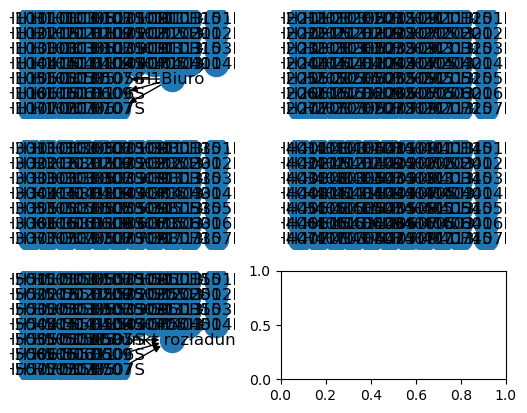

In [1692]:
graphs=[H1,H2,H3,H4,H5]
plt.figure(figsize=(100,100))
fig, axes = plt.subplots(nrows=3, ncols=2)
ax = axes.flatten()
for i in range(5):
    pos=draw_nodes(graphs[i])
    nx.draw_networkx(graphs[i],pos=pos, ax=ax[i])
    ax[i].set_axis_off()